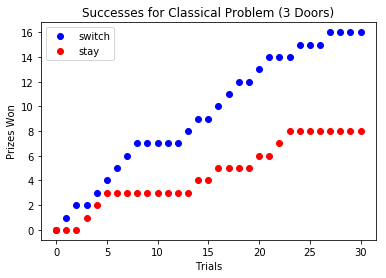

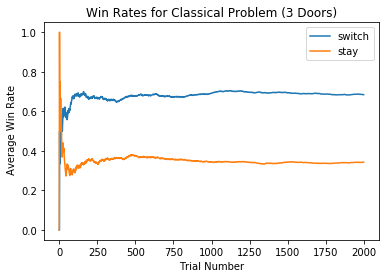

success rate for switch: 0.6843421710855427
success rate for stay: 0.3426713356678339


In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

# single monty hall simulation
def monty_hall(switch, num_doors):
    d = num_doors-1
    
    prize = random.randint(0,d)
    first_choice = random.randint(0,d)
    revealed = random.randint(0,d)
    
    # select a door to reveal that is not the selected door or the door with the prize
    while revealed == first_choice or revealed == prize:
        revealed = random.randint(0,d)
        
    final_choice = first_choice
    
    if switch:
        while final_choice == first_choice or final_choice == revealed:
            final_choice = random.randint(0,d)
            
    if final_choice == prize:
        return 1
    else:
        return 0

# run simulations for given N, return successes
def monte_carlo(trials, switch=True, num_doors=3):
    
    successes = [0]
    num_successes = 0
    
    for N in [x for x in trials if x!=0]:
        num_successes += monty_hall(switch, num_doors)
        successes.append(num_successes)
        
    return successes

f1 = plt.figure()
y = np.arange(0,31,1)
sw = monte_carlo(y,switch=True)
st = monte_carlo(y,switch=False)
plt.plot(y,sw,'bo',label='switch')
plt.plot(y,st,'ro',label='stay')
plt.title('Successes for Classical Problem (3 Doors)')
plt.xlabel('Trials')
plt.ylabel('Prizes Won')
plt.legend()
plt.show()
f1.savefig('30trials.pdf')


#plot success rate over 1000 trials for switch vs stay
num_trials = 2000

x = np.arange(0,num_trials,1)
switch = monte_carlo(x, switch=True)
stay = monte_carlo(x, switch=False)

def win_rate(x,y):
    rates = [0.0]
    for i in x:
        if x[i]!=0:
            rates.append(y[i]/x[i])
    return rates
        
f2 = plt.figure()
plt.plot(x,win_rate(x,switch),label='switch')
plt.plot(x,win_rate(x,stay),label='stay')
plt.title('Win Rates for Classical Problem (3 Doors)')
plt.xlabel('Trial Number')
plt.ylabel(' Average Win Rate')
plt.legend()
plt.show()
f2.savefig('3doors.pdf')

print('success rate for switch: ' + str(switch[-1]/x[-1]))
print('success rate for stay: ' + str(stay[-1]/x[-1]))


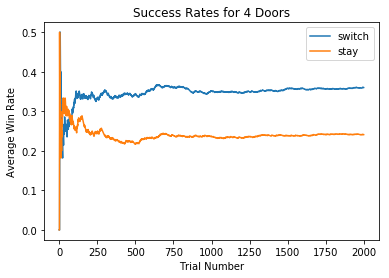

success rate for switch: 0.3601800900450225
success rate for stay: 0.24112056028014006


In [4]:
# run simulations for 4 doors

switch4 = monte_carlo(x, switch=True, num_doors=4)
stay4 = monte_carlo(x, switch=False, num_doors=4)

f3 = plt.figure()
plt.plot(x,win_rate(x,switch4),label='switch')
plt.plot(x,win_rate(x,stay4),label='stay')
plt.title('Success Rates for 4 Doors')
plt.xlabel('Trial Number')
plt.ylabel('Average Win Rate')
plt.legend()
plt.show()
f3.savefig('4doors.pdf')

print('success rate for switch: ' + str(switch4[-1]/x[-1]))
print('success rate for stay: ' + str(stay4[-1]/x[-1]))

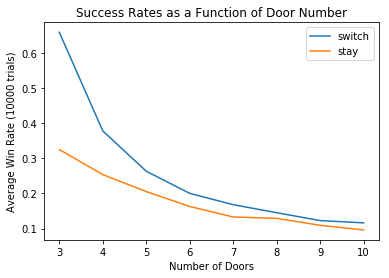

In [5]:
#show success rate as a function of the number of doors

xs = np.arange(0,10000,1)
doors = np.arange(3,11,1)
switch_rates = []
stay_rates = []

for d in doors:
    switch = monte_carlo(xs, switch=True, num_doors=d)
    stay = monte_carlo(xs, switch=False, num_doors=d)
    switch_rates.append(switch[-1]/xs[-1])
    stay_rates.append(stay[-1]/xs[-1])

f4 = plt.figure()
plt.plot(doors,switch_rates,label='switch')
plt.plot(doors,stay_rates,label='stay')
plt.title('Success Rates as a Function of Door Number')
plt.xlabel('Number of Doors')
plt.ylabel('Average Win Rate (10000 trials)')
plt.legend()
plt.show()
f4.savefig('fdoors.pdf')
    